<a href="https://colab.research.google.com/github/The23ird/The23ird/blob/main/Customer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
 from IPython import get_ipython
from IPython.display import display
# %%
from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# Assuming you uploaded a single file, get the filename
# Note: If you upload multiple files, you'll need to handle the 'uploaded' dictionary
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}"')
  filename = fn

# Read the uploaded CSV file
# Use the filename variable which holds the name of the uploaded file
# Pass the filename as a string to read_csv, either using the variable filename
# or a string literal like 'ecommerce_customer_data.csv'
df = pd.read_csv(filename)

df.head{}
df = pd.read_csv('ecommerce_customer_data.csv')

Saving ecommerce_customer_data.csv to ecommerce_customer_data (3).csv
User uploaded file "ecommerce_customer_data (3).csv"


# New Section

In [16]:
df.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


# New Section

In [17]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


np.int64(0)

<ipython-input-21-6cd682caca1e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender' , data = df, palette='pastel')


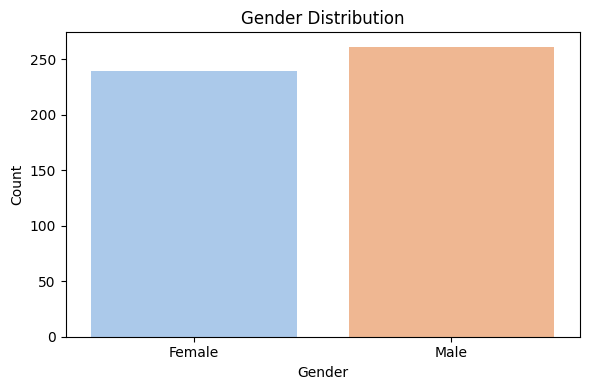

In [21]:
#Understand the customer demographics starting with gender
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6 , 4))
sns.countplot(x = 'Gender' , data = df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# New Section

<function matplotlib.pyplot.show(close=None, block=None)>

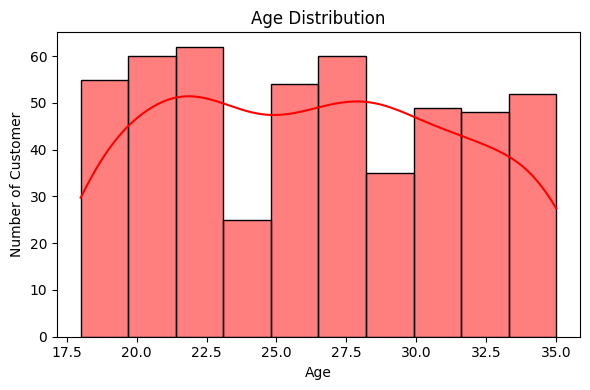

In [23]:
from contextlib import redirect_stderr
#understand the customer demographics in light of age
plt.figure(figsize=(6 , 4))
sns.histplot(df["Age"], bins=10, kde=True, color="red")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show


# New Section

<Axes: title={'center': 'Top 10 Locations'}, ylabel='Location'>

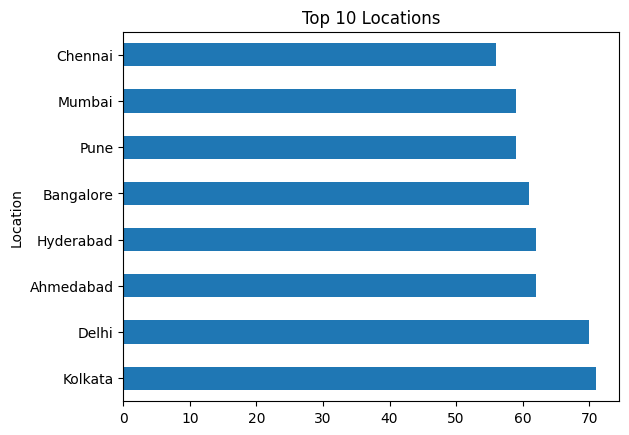

In [24]:
#understand the customer demographics in light of location
df['Location'].value_counts().head(10).plot(kind='barh', title="Top 10 Locations")


<ipython-input-28-5f4bb1e4e747>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')


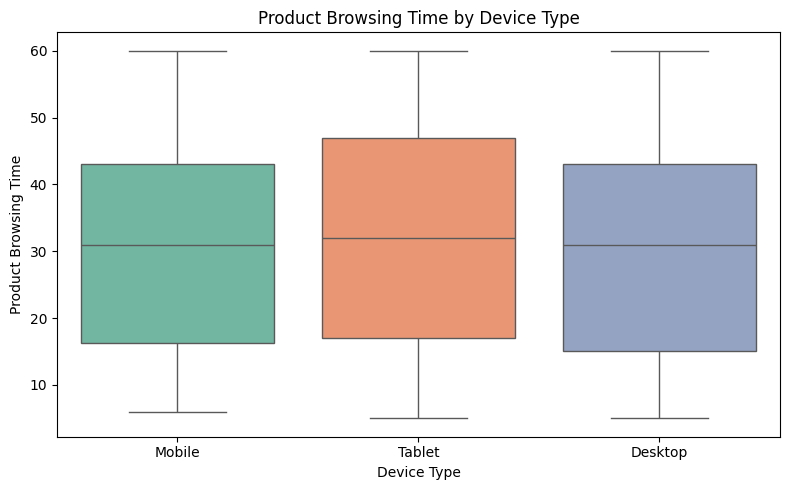

<ipython-input-28-5f4bb1e4e747>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')


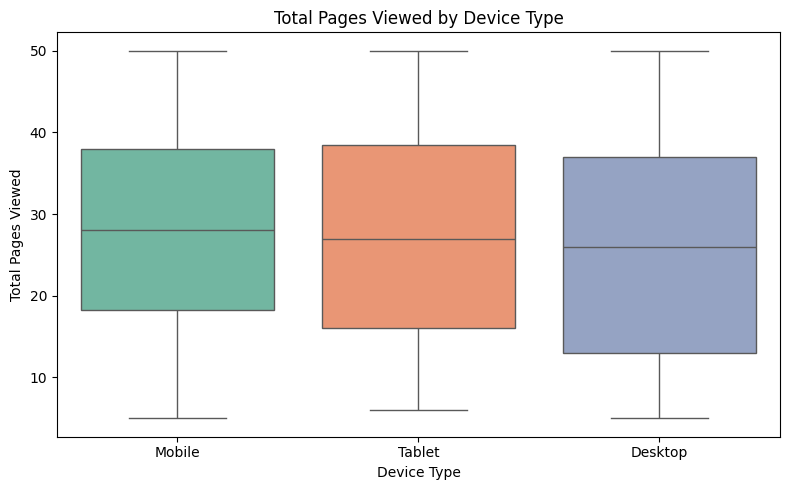

<ipython-input-28-5f4bb1e4e747>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')


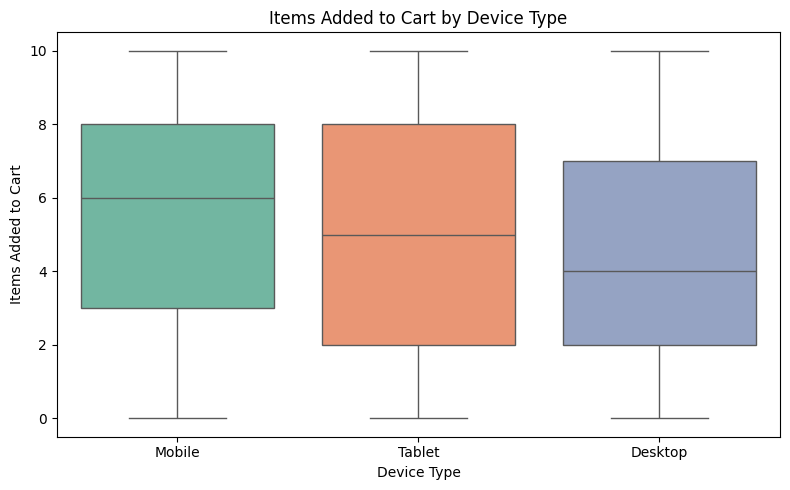

<ipython-input-28-5f4bb1e4e747>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')


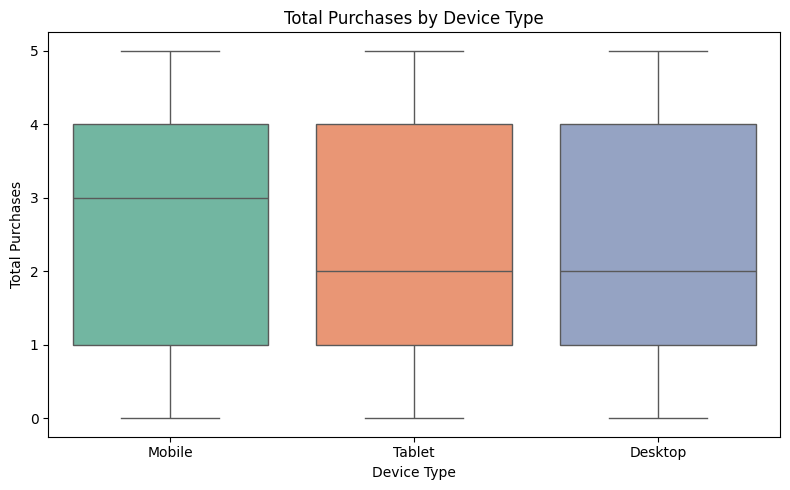

In [28]:
#Device usage analysis
#Exploring how different types of devices are used by customers and their impact on behavior.

behavior_metrics = ['Product_Browsing_Time', 'Total_Pages_Viewed', 'Items_Added_to_Cart', 'Total_Purchases']

# Plot boxplots for each metric by Device_Type
for metric in behavior_metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Device_Type', y=metric, data=df, palette='Set2')
    plt.title(f'{metric.replace("_", " ")} by Device Type')
    plt.xlabel('Device Type')
    plt.ylabel(metric.replace("_", " "))
    plt.tight_layout()
    plt.show()


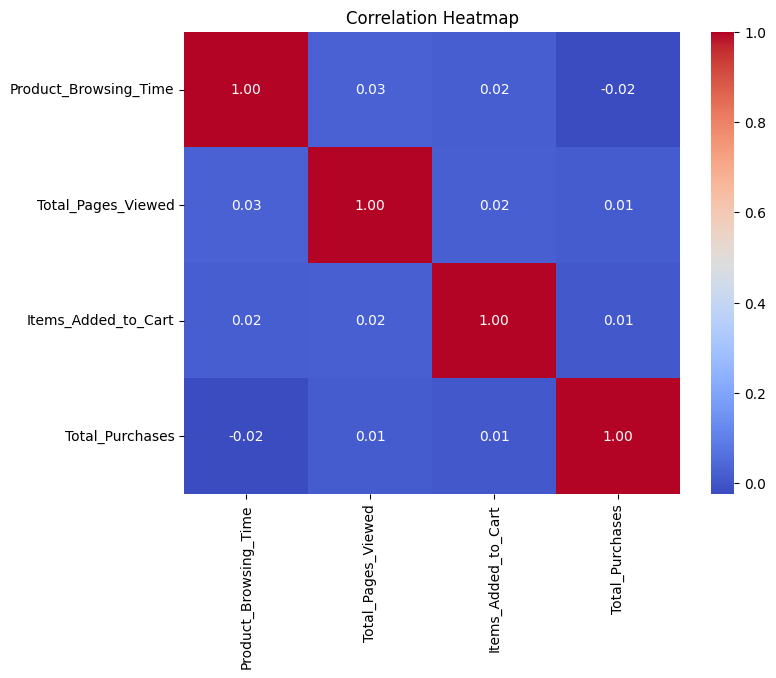

In [29]:
#Investigating the relationship between browsing time, pages viewed, items added to the cart, and actual purchases.
plt.figure(figsize=(8, 6))
sns.heatmap(df[behavior_metrics].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

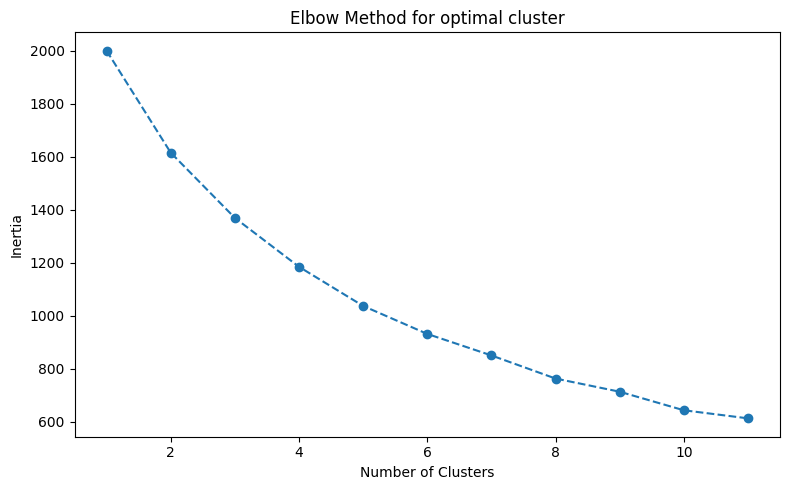

In [33]:
#Segmenting customers based on their behavior and identifying distinct customer groups.
#This explains
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x = df[behavior_metrics]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Using the elbow method to determine the optimal number of cluster
inertia = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

#plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 12), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for optimal cluster')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()




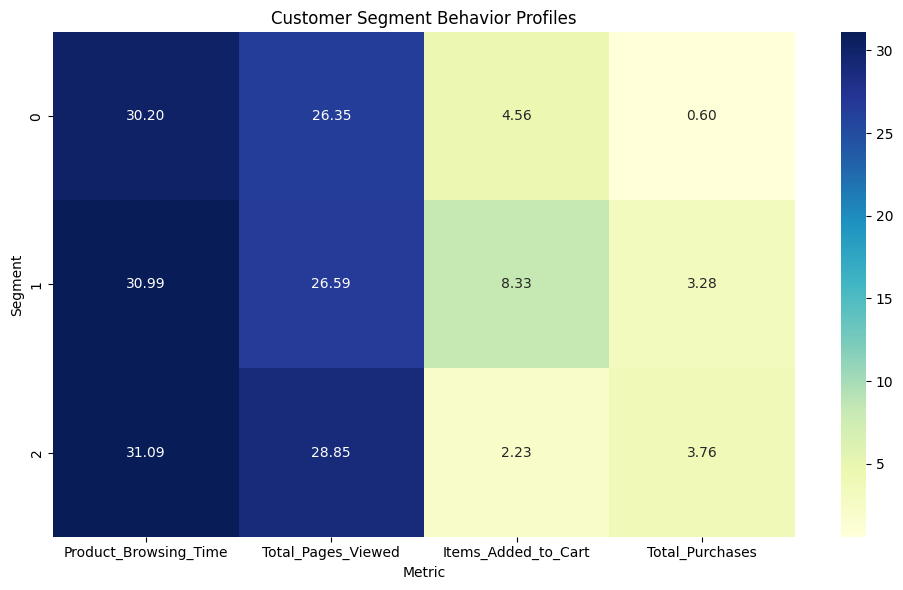

(         Product_Browsing_Time  Total_Pages_Viewed  Items_Added_to_Cart  \
 Segment                                                                   
 0                    30.201117           26.346369             4.564246   
 1                    30.994152           26.590643             8.327485   
 2                    31.093333           28.853333             2.226667   
 
          Total_Purchases  
 Segment                   
 0               0.597765  
 1               3.280702  
 2               3.760000  ,
 Segment
 0    179
 1    171
 2    150
 Name: count, dtype: int64)

In [35]:
# To calculate ethe behavioural metrics, to Segment customers based on their
# behavior and identifying distinct customer groups.
#Apply KMeans with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(x_scaled)

# Calculate average behavior metrics per segment
segment_profiles = df.groupby('Segment')[behavior_metrics + ['Revenue'] if 'Revenue' in df else behavior_metrics].mean()

# Count of customers per segment
segment_counts = df['Segment'].value_counts().sort_index()

# Plot segment profiles
plt.figure(figsize=(10, 6))
sns.heatmap(segment_profiles, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Customer Segment Behavior Profiles')
plt.ylabel('Segment')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

segment_profiles, segment_counts


<ipython-input-41-698c8ae70805>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Conversion Rate', data=conversion_df, palette='viridis')


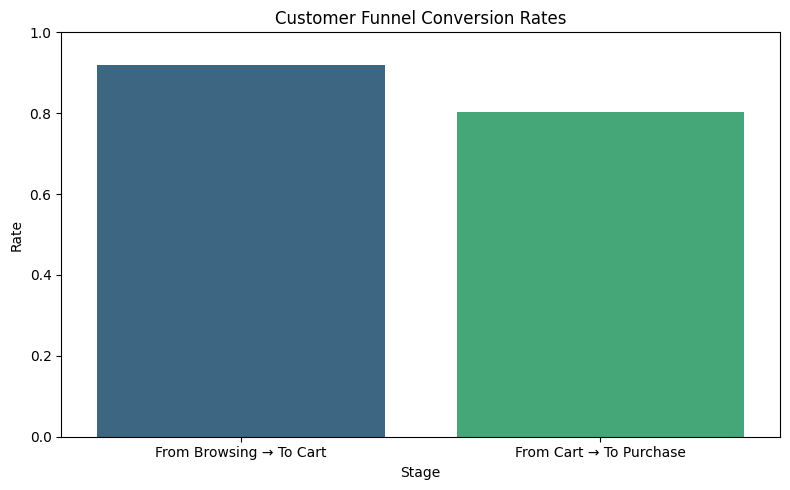

,Stage,Conversion Rate
0,From Browsing → To Cart,0.918
1,From Cart → To Purchase,0.802


In [41]:
# Analyzing the customer journey and identifying potential areas for improvement in the conversion funnel.
# Funnel Conversion Analysis

# Conversion rates at each stage
browsing_to_cart = (df['Items_Added_to_Cart'] > 0).mean()
cart_to_purchase = (df['Total_Purchases'] > 0).mean()

# Create conversion DataFrame
conversion_df = pd.DataFrame({
    'Stage': ['From Browsing → To Cart', 'From Cart → To Purchase'],
    'Conversion Rate': [browsing_to_cart, cart_to_purchase]
})

# Plot conversion rates
plt.figure(figsize=(8, 5))
sns.barplot(x='Stage', y='Conversion Rate', data=conversion_df, palette='viridis')
plt.title('Customer Funnel Conversion Rates')
plt.ylim(0, 1)
plt.ylabel('Rate')
plt.tight_layout()
plt.show()

conversion_df


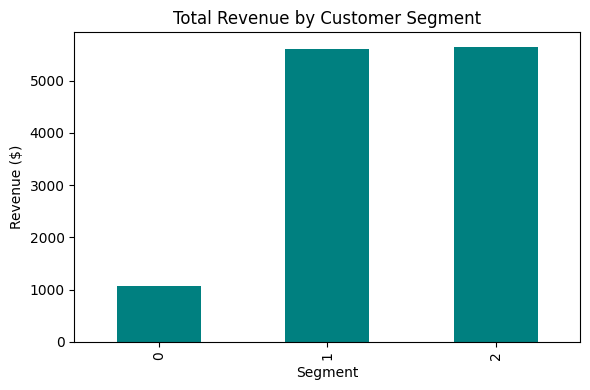

,Revenue
Segment,
0,1070
1,5610
2,5640


In [42]:
# Assessing the impact of customer behavior on revenue generation and
# identifying opportunities for increasing sales and customer engagement.
# Assuming it cost $10 per purchase
PURCHASE_VALUE = 10
df['Revenue'] = df['Total_Purchases'] * PURCHASE_VALUE

# Revenue by customer segment
revenue_by_segment = df.groupby('Segment')['Revenue'].sum()

# Plot revenue by segment
plt.figure(figsize=(6, 4))
revenue_by_segment.plot(kind='bar', color='teal')
plt.title('Total Revenue by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

revenue_by_segment